In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

import warnings
warnings.filterwarnings("ignore")

In [23]:
features = 5000
length = 300
batch_size = 32

In [24]:
(X_tr, y_tr), (X_te, y_te) = imdb.load_data(num_words=features)

In [25]:
X_tr.shape

(25000,)

In [26]:
len(X_tr[0])

218

In [27]:
len(X_tr[6343])

168

In [28]:
X_tr = sequence.pad_sequences(X_tr, maxlen=length)
X_te = sequence.pad_sequences(X_te, maxlen=length)

In [29]:
len(X_tr[0])

300

In [30]:
len(X_tr[6343])

300

In [31]:
model = Sequential([
    Embedding(features, 32),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])

In [32]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
model.fit(X_tr, y_tr, epochs=20, batch_size=batch_size, validation_data=(X_te, y_te))

Epoch 1/20
782/782 [==============================] - 76s 96ms/step - loss: 0.5682 - accuracy: 0.6901 - val_loss: 0.4213 - val_accuracy: 0.8205
Epoch 2/20
782/782 [==============================] - 71s 91ms/step - loss: 0.4123 - accuracy: 0.8173 - val_loss: 0.4110 - val_accuracy: 0.8260
Epoch 3/20
782/782 [==============================] - 65s 83ms/step - loss: 0.2933 - accuracy: 0.8812 - val_loss: 0.4148 - val_accuracy: 0.8243
Epoch 4/20
782/782 [==============================] - 63s 81ms/step - loss: 0.2224 - accuracy: 0.9154 - val_loss: 0.4880 - val_accuracy: 0.7784
Epoch 5/20
782/782 [==============================] - 70s 90ms/step - loss: 0.1967 - accuracy: 0.9241 - val_loss: 0.6736 - val_accuracy: 0.7879
Epoch 6/20
782/782 [==============================] - 68s 86ms/step - loss: 0.1420 - accuracy: 0.9486 - val_loss: 0.8153 - val_accuracy: 0.6809
Epoch 7/20
782/782 [==============================] - 73s 93ms/step - loss: 0.1260 - accuracy: 0.9540 - val_loss: 0.6874 - val_accuracy:

In [35]:
import matplotlib.pyplot as plt

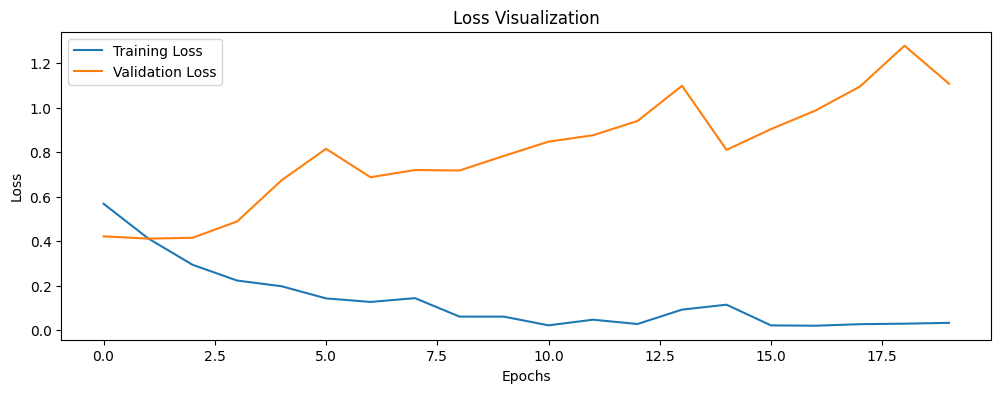

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

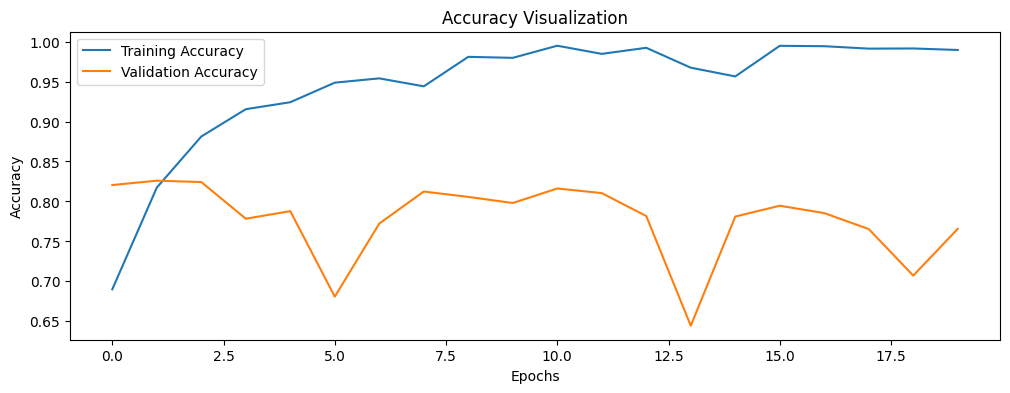

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()